# Empalme con la clase anterior
## Gradiente de una ANN

Recuerde esta propiedad importante de la funcion logistica sigmoid.
$$ S'(t) = S(t) (1 - S(t)) .$$


Lo que necesitamos es evaluar el gradiente de $J$ usando esta hipoteis.
La ultima ecuacion en forma indicial la escribimos como

$$h_{ij}(\Theta, X) = S \left ( \sum_k A_{ik}^{(L)} \Theta_{kj}^{(L)} \right ) = S_{ij} = A_{ij}^{(L+1)}$$

Recordemos la funcion de costo


$$ J(\theta) = -\frac1m \sum_{i=1}^m \sum_{j=1}^K y_i^{(j)} \log[ h_j(\theta, x^{(i)})] + (1 - y_i^{(j)}) \log [ 1 - h_j(\theta, x^{(i)})] + \frac{\lambda}{2m} \sum_{l=1}^L \sum_{i=1}^{n_l} \sum_{j=1}^{n_{l+1}} (\Theta_{ij}^{(l)})^2 .$$
Necesitamos las derivadas parciales con respecto a los $\Theta$s.

Construyo solamente las derivadas en la ultima capa y en la siguiente clase para la penultima, ante-penultima, y asi hasta la primera.

Por ahora nos olvidamos de la regularizacion
llamamos $y_i^{(j)}=y_{ij}$.

\begin{eqnarray}
\frac{\partial J(\Theta, x)}{\partial \Theta_{pq}^{(L)}}
&=&-\frac1m \sum_i \sum_j y_{ij}  \frac{S_{ij}(1 - S_{ij})}{S_{ij}}
\sum_k A_{ik}^{(L)} \delta_{pk} \delta_{qj} +
\frac1m \sum_i \sum_j (1 - y_{ij}) \frac{S_{ij}(1-S_{ij})}{1 - S_{ij}} \sum_{k} A_{ik}^{(L)} \delta_{pk} \delta_{qj} \\
&=& \frac1m \sum_i -y_{iq}  (1 - S_{iq}) A_{ip}^{(L)}
  + (1-y_{iq})S_{iq} A_{ip}^{(L)} \\
  &=& \frac1m \sum_i (S_{iq}-y_{iq}) A_{ip}^{(L)} \\
  &=& \frac1m \sum_i (A_{iq}^{(L+1)}-y_{iq}) A_{ip}^{(L)} \\
  &=& \frac1m {(A^{(L)})^T}_p ( A^{(L+1)} - Y)_q.
\end{eqnarray}

\begin{eqnarray}
\frac{\partial J(\Theta, x)}{\partial \Theta_{pq}^{(L)}}
  = \frac1m {(A^{(L)})^T}_p ( A^{(L+1)} - Y)_q. \tag{3.3.59}
\end{eqnarray}

Queremos

\begin{eqnarray}
\frac{\partial J(\Theta, x)}{\partial \Theta_{pq}^{(L-1)}}
\end{eqnarray}

Recordamos lo siguiente (la idea es viajar hasta $\Theta^{(L-1)}$


$$h_{ij}(\Theta, X) = S \left ( \sum_k A_{ik}^{(L)} \Theta_{ik}^{(L)}  \right )  = A^{(L+1)} .$$

para obtener el $\Theta^{(L-1)}$ necesito expandir el $A_{ik}^{(L)}$


$$ A_{ik}^{(L)} = S(Z_{ik}^{(L)}) = S \left ( \sum_r A_{ir}^{(L-1)} \Theta_{rk}^{(L-1)}  \right ) \tag{1} .$$


Tenemos.


\begin{eqnarray}
\frac{\partial \log( h_{ij}(\Theta, X))}{\partial \Theta_{pq}^{(L-1)}} &=& \frac{1}{S_{ij}} S_{ij}(1 - S_{ij}) \sum_k \frac{\partial A_{ik}^{(L)}}{\partial \Theta_{pq}^{(L-1}} \Theta_{kj}^{(L)}  \\
&=& (1 - A_{ij}^{(L+1)}) \sum_k \frac{\partial A_{ik}^{(L)}}{\partial \Theta_{pq}^{(L-1)}} \Theta_{kj}^{(L)}  \tag{2}
\end{eqnarray}

Pero, usando la Ecuacion (1).

\begin{eqnarray}
\frac{\partial A_{ik}^{(L)}}{\partial \Theta_{pq}^{(L-1)}} =
S_{ik}(1 -S_{ik}) \sum_r A_{ir}^{(L-1)} \delta_{rp} \delta_{kq} = A_{ik}^{(L)}(1 - A_{ik}^{(L)}) A_{ip}^{(L-1)} \delta_{kq}
\tag{3}.
\end{eqnarray}

reemplazamos (3) en la (2).

Obtenemos
\begin{eqnarray}
\frac{\partial \log( h_{ij}(\Theta,  X))}{\partial \Theta_{pq}^{(L-1)}} = (1 - A_{ij}^{(L+1)}) ( A_{iq}(1 - A_{iq}^{(L)})) A_{ip}^{(L-1)}  \Theta_{qj}^{(L)}.
\end{eqnarray}

De la misma forma


\begin{eqnarray}
\frac{\partial \log ( 1 - h_{ij}(X , \Theta))}{\partial \Theta_{pq}^{(L-1)}} &=& -\frac{1}{1- S_{ij}} S_{ij} (1 - S_{ij}) \sum_k \frac{\partial A_{ik}^{(L)}}{\partial \Theta_{pq}^{(L-1}} \Theta_{kj}^{(L)} \\
&=& -A_{ij}^{(L+1)}  \sum_k \frac{\partial A_{ik}^{(L)}}{\partial \Theta_{pq}^{(L-1}}  \\
&=& -A_{ij}^{(L+1)} \left ( A_{iq}^{(L)} (1 - A_{iq}^{(L)} A_{ip}^{(L-1})
\right ) \Theta_{qj}^{(L)}.
\end{eqnarray}

\begin{eqnarray}
y_{ij} \frac{\partial \log ( h_{ij}(\Theta, X))}{\partial \Theta_{pq}^{(L-1)}} +
(1 - y_{ij}) \frac{\partial 1 - \log ( h_{ij}(\Theta, X))}{\partial \Theta_{pq}^{(L-1)}} &=&
\left ( A_{iq}^{(L)} (1 - A_{iq}^{(L)}) A_{ip}^{(L-1)}  \right ) \Theta_{qj}^{(L)} [ y_{ij}(1 - A_{ij}^{(L+1)}) - (1- y_{ij}) A_{ij}^{(L+1)}  \\
&=& (y_{ij} - A_{ij}^{(L+1)}) \left ( A_{iq}^{(L)} (1 - A_{iq}^{(L)}) A_{ip}^{(L-1)}  \right ) \Theta_{qj}^{(L)}.
\end{eqnarray}

\begin{eqnarray}
\frac{\partial J(\Theta, X)}{\partial \Theta_{pq}^{(L-1)}}
&=& -\frac1m \sum_i \sum_j  (y_{ij} - A_{ij}^{(L+1)}) \left ( A_{iq}^{(L)} (1 - A_{iq}^{(L)}) A_{ip}^{(L-1)}  \right ) \Theta_{qj}^{(L)} \\
&=& \frac1m \sum_i A_{iq}^{(L)} (1 - A_{iq}^{(L)}) A_{ip}^{(L-1)} \sum_j (A_{ij}^{(L+1)} - y_{ij}) {\Theta_{qj}^{(L)}}^T \\
&=&  \frac1m \sum_i A_{iq}^{(L)} (1 - A_{iq}^{(L)}) A_{ip}^{(L-1)} [(A^{(L+1)} - Y) \Theta^{(L)}]_{iq} \\
&=& \frac1m \sum_i A_{ip}^{(L-1)} [ (A^{(L+1)}- Y) {\Theta^{(L)}}^{T}]_{iq} A_{iq}^{(L)} ( 1 - A_{iq}^{(L)}) \\
&=& \frac1m \sum_i A_{ip}^{(L-1)} [ (A^{(L+1)}- Y) {\Theta^{(L)}}^{T}]_{iq} [ A^{(L)} .* (1 - A^{(L)})]_{iq} \\
&=& \frac1m  [ (A^{(L-1)})^T]_p \left [ (A^{(L+1)}- Y) {\Theta^{(L)}}^{T}][ A^{(L)} .* (1 - A^{(L)}) \right ]_{q}
\end{eqnarray}
Recuerden que $.*$ es el producto Hadamard (componente-a-componente).

En general, de la misma forma vemos que

$$ \frac{\partial J(\Theta, X)}{\partial \Theta_{pq}^{(I)}}=
 \frac1m  [ (A^{(I)})^T]_p \left [ (A^{(I+2)}- Y) {\Theta^{(I+1)}}^{T}][ A^{(I+1)} .* (1 - A^{(I+1)}) \right ]_{q}  .$$
 donde $I=L-1, L-2, \cdots, 1$.

 El algoritmo para calcular el gradiente es el siguiente.



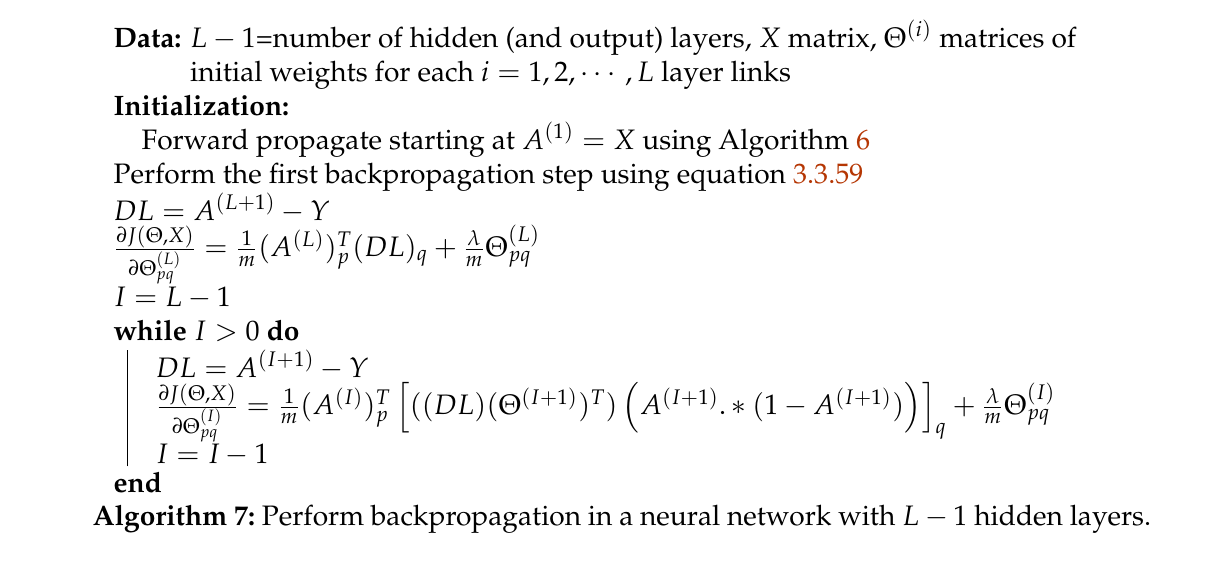

Derivada Del termino de regularizacion.



$$R =  \frac{\lambda}{2m} \sum_{l=1}^{L} \sum_{i=1}^{n_l} \sum_{j=1}^{n^{l+1}} (\Theta_{ij}^{l})^2 .$$

\begin{eqnarray}
\frac{\partial R}{\partial \Theta_{pq}^{r}}
= \frac{\lambda}{m} \sum_l \sum_i \sum_j \frac{\partial \Theta_{ij}^{(l)}}{\partial \Theta_{pq}^{r}} \Theta_{ij}^{(l)}
= \frac{\lambda}{m} \sum_l \sum_i \sum_j \delta_{pi} \delta_{qj} \delta_{rl}  \Theta_{ij}^{(l)}  =  \frac{\lambda}{m} \Theta_{pq}^{r}
\end{eqnarray}

Una vez se tiene el gradiente, recuerde que viene el descenso con el algoritmo

$$\Theta^{i} = \Theta^{(i-1)} - \alpha \nabla_{\Theta} J(\Theta, X) .$$

La aplicacion es con el MNIST data.  Es la tarea de esta semana.

# Clase siguiente: Diagnosticos y seleccion de modelos.